<a href="https://colab.research.google.com/github/KeskilV/Basins-of-equation-roots/blob/master/verona_1%D0%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import re

import matplotlib.pyplot as plt
import seaborn as sns


# Прочитать выгрузку из google **таблицы**

In [55]:
#https://docs.google.com/spreadsheets/d/1wPp-8KKKyamcDZFKCnzdIsAKH1tRuc4L/edit?usp=sharing&ouid=105770816346873505675&rtpof=true&sd=true
#вычленяем id расходы по заказам14-08-2023

id = '1wPp-8KKKyamcDZFKCnzdIsAKH1tRuc4L'
df = pd.read_excel(f'https://docs.google.com/spreadsheets/d/{id}/export?format=xlsx', sheet_name='TDSheet', header=None)

In [57]:
#подготовка
df.dropna(subset=[0],inplace=True)

In [65]:
#убираем мусор до первого даговора индекс второго упоминания 'Договор'
seconddognd = df.loc[df[0].str.startswith('Договор'),[0]].index[1]#iloc[1,[0]]

In [69]:
df[~df.index.isin(range(seconddognd))]

,0,1,2,3,4
14,"Договор 000021563 от 19.08.2021 15:46:22, Хаст...",NaN,NaN,NaN,23294.51
15,Доп РАСХОДЫ на заказ SS,NaN,NaN,NaN,11887.2
16,"Расход 06181 от 10.03.2023 10:51:47, Р/сч КСВ ...",NaN,NaN,NaN,7383
17,"Расход 07635 от 21.04.2023 17:28:38, Р/сч КСВ ...",NaN,NaN,NaN,1200
18,"Расход 08468 от 18.05.2023 19:41:27, Цех касса...",NaN,NaN,NaN,800
...,...,...,...,...,...
6003,"Договор 000022988 от 09.08.2023 18:42:35, АО ""...",NaN,NaN,NaN,40000
6004,Материалы МЕСТНЫЕ SS,NaN,NaN,NaN,40000
6005,"Расход 10547 от 26.07.2023 18:26:28, Р/сч КСВ ...",NaN,NaN,NaN,35000
6006,"Расход 10730 от 04.08.2023 14:36:59, Админ кас...",NaN,NaN,NaN,5000


In [73]:
df = df[~df.index.isin(range(seconddognd))].copy()

In [77]:
df.dropna(axis=1, inplace=True)

In [80]:
#колонка для договора
df['dogovor']=np.nan

In [81]:
df.loc[df[0].str.startswith('Договор'),'dogovor']=df[0]

In [82]:

df.fill

,0,4,dogovor
14,"Договор 000021563 от 19.08.2021 15:46:22, Хаст...",23294.51,"Договор 000021563 от 19.08.2021 15:46:22, Хаст..."
15,Доп РАСХОДЫ на заказ SS,11887.2,NaN
16,"Расход 06181 от 10.03.2023 10:51:47, Р/сч КСВ ...",7383,NaN
17,"Расход 07635 от 21.04.2023 17:28:38, Р/сч КСВ ...",1200,NaN
18,"Расход 08468 от 18.05.2023 19:41:27, Цех касса...",800,NaN
...,...,...,...
6003,"Договор 000022988 от 09.08.2023 18:42:35, АО ""...",40000,"Договор 000022988 от 09.08.2023 18:42:35, АО ""..."
6004,Материалы МЕСТНЫЕ SS,40000,NaN
6005,"Расход 10547 от 26.07.2023 18:26:28, Р/сч КСВ ...",35000,NaN
6006,"Расход 10730 от 04.08.2023 14:36:59, Админ кас...",5000,NaN


In [33]:
df.loc[~df[0].str.startswith('Расход')&~df[0].str.startswith('Договор'),0].unique()

array(['Параметры:', 'Отбор:', 'Статья затрат',
       '<Объект не найден> (213:ab9804d4c48e095c11eda154f98115dd), , , ',
       'Банк % (Расс,Экв,QR) SS',
       '<Объект не найден> (213:ab9804d4c48e095c11eda155ba692032), , , ',
       'Доп РАСХОДЫ на заказ SS', 'Дост мат ЗАКАЗНЫЕ SS',
       'Контроль качества', 'Материалы МЕСТНЫЕ SS',
       'Такси (дост клиентам) SS', 'Агентское вознагр SS',
       'Выставочные образцы', 'Дост мат ЗАПАС ', 'Дост мат МЕСТНЫЕ SS',
       'Материалы ЗАКАЗНЫЕ кл SS', 'Дост мат( БЕЗ привязки)',
       'Мат+др расх"Без Договора"', 'Материалы склад ЗАПАС ',
       'Благотворительность', 'Ремонт по гарантии',
       'Материалы РАСХОДНИКИ', 'Итого'], dtype=object)

In [25]:
df

,0,1,2,3,4,dogovor
1,Параметры:,NaN,Начало периода: 01.01.2023 0:00:00,NaN,NaN,NaN
3,Отбор:,NaN,Договор Заполнено,NaN,NaN,NaN
5,"Договор, Контрагент, Изделие, Сумма расчетов",NaN,NaN,NaN,Сумма,NaN
6,Статья затрат,NaN,NaN,NaN,NaN,NaN
7,"Расход, Кошелек, Примечание",NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
6003,"Договор 000022988 от 09.08.2023 18:42:35, АО ""...",NaN,NaN,NaN,40000,NaN
6004,Материалы МЕСТНЫЕ SS,NaN,NaN,NaN,40000,NaN
6005,"Расход 10547 от 26.07.2023 18:26:28, Р/сч КСВ ...",NaN,NaN,NaN,35000,NaN
6006,"Расход 10730 от 04.08.2023 14:36:59, Админ кас...",NaN,NaN,NaN,5000,NaN


In [ ]:
'erere'.__contains__("")

In [ ]:
df['Изделие'].unique()

array(['Кабинет Зам. директора', 'Гардероб', 'Кухня', 'Прихожая',
       'Гардеробная, стеллаж и перегородка',
       'Шкаф и стол местн. ЛДСП ФИНИШ', 'Шкаф-купе благотворительность',
       'Столы с тумбой вар1', 'Тумбы 3 шт', 'Детская',
       'шкаф 1шт благотворительность', 'Кабинет главврача ФИНИШ',
       'Техника', 'Шкаф', 'Столешница, фартук и мойка', 'Кухня 1',
       'Прихожая и шкаф инвентарь', 'Спальня', 'Шкаф в инсталляцию',
       'Офисная мебель', 'Шкаф витрина', 'Витрина с тумбой', 'Шкаф ЛДСП',
       'Тумба + стол', 'Стеновые панели №3 и №4', 'Столешница',
       'Столешница+фартук', 'Шкаф с зеркалами', 'Шкаф и барная',
       'Стеллаж для книг', 'УТВ шкафы', 'Шкаф прихожая', 'Шкаф Детская',
       'Шкафы', 'кухня УТВ', 'Шкаф, Тумба МДФ', 'Доделка кухни',
       'Вытяжка', 'Тумба и шкафчик над инсталляцией в ванну',
       'Рина мебеля', 'ТВ тумба', 'Витрина добавочная', 'Шкаф и кровать',
       'Тумба в ванную', 'Столешница острова Камень', 'рабочий стол',
       'дива

In [ ]:
df['Итоговая сумма'] = df['Итоговая сумма'].str.replace(' ','').str.replace(',','.').astype('float')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335 entries, 0 to 334
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Номер договора  334 non-null    float64       
 1   Дата договора   335 non-null    datetime64[ns]
 2   Статус заказа   0 non-null      float64       
 3   Организация     335 non-null    object        
 4   Изделие         335 non-null    object        
 5   Заказчик        335 non-null    object        
 6   Ответственный   335 non-null    object        
 7   Сумма расчетов  335 non-null    object        
 8   Доп. скидка     335 non-null    object        
 9   Итоговая сумма  335 non-null    object        
 10  Оплачено        335 non-null    object        
dtypes: datetime64[ns](1), float64(2), object(8)
memory usage: 28.9+ KB


In [ ]:
df['Ответственный'].unique()

array(['Афанасий Боянов', 'Кокорев Иван', 'Лилия Никитина',
       'Вера Захарова', 'Матвей Осоров', 'Настя',
       'Кириллина Аселина Софроновна', 'Стручкова Екатерина', 'Симон',
       'Вилена Тимофеева', 'Надежда Иванова', 'Елена Егорова',
       'Куулар Юрий', 'Дьяконова Алина', 'Симон Федулов'], dtype=object)

# Есть отмененные договоры

In [ ]:
df[((df['Итоговая сумма']==0) | df['Итоговая сумма'].isna())]

,Номер договора,Дата договора,Статус заказа,Организация,Изделие,Заказчик,Ответственный,Сумма расчетов,Доп. скидка,Итоговая сумма,Оплачено
20,6119.0,2023-01-28,NaN,ИП Колодезников С. В.,Кухня 1,Соломонова Нюрбина Ивановна,Лилия Никитина,"200 521,00","200 521,00",0,"200 521,00"
47,6155.0,2023-02-20,NaN,ИП Колодезников С. В.,Гардероб,Маликова Светлана Николаевна,Лилия Никитина,"53 511,00","53 511,00",0,"53 511,00"
180,6260.0,2023-05-16,NaN,ИП Колодезников С. В.,Тумба,Винокурова Василика Васильевна,Кокорев Иван,"103 516,00","103 516,00",0,0
317,63100.0,2023-08-08,NaN,ИП Колодезников С. В.,Кухня Orwood шоурум камень,Федулов Симон Семенович,Симон Федулов,"340 164,00","340 164,00",0,0
318,63100.0,2023-08-08,NaN,ИП Колодезников С. В.,Кухня Orwood шоурум техника,Федулов Симон Семенович,Симон Федулов,"145 415,00","145 415,00",0,0
319,63100.0,2023-08-08,NaN,ИП Колодезников С. В.,Кухня Orwood шоурум,Федулов Симон Семенович,Симон Федулов,"533 474,00","533 474,00",0,0
320,63100.0,2023-08-08,NaN,ИП Колодезников С. В.,"Кухня выставочная LuxFront шоурум, Кухня выста...",Федулов Симон Семенович,Симон Федулов,"1 485 203,00","1 485 203,00",0,0
321,63100.0,2023-08-08,NaN,ИП Колодезников С. В.,Кухня выставочная LuxFront шоурум техника,Федулов Симон Семенович,Симон Федулов,"116 853,00","116 853,00",0,0
322,63100.0,2023-08-08,NaN,ИП Колодезников С. В.,Стойка для стульев шоурум,Верона,Симон Федулов,"214 625,00","214 625,00",0,0
323,63100.0,2023-08-08,NaN,ИП Колодезников С. В.,Шкаф Mixal шоурум,Верона,Симон Федулов,"560 933,00","560 933,00",0,0


In [ ]:
df = df[~((df['Итоговая сумма']==0) | df['Итоговая сумма'].isna())].copy()

In [ ]:
len(df)

325

# Отметить тендеры и продажу
'Ответственный']=='Матвей Осоров','tender'
'посудомойка и вытяжка','стулья', 'техника', 'Техника', 'ПОСТАВКА ТОВАРА', 'Стулья', 'Стул', 'cтул'
        'Техника Hyundai', 'Техника Hyundai', 'Стулья Барные', 'Стул Deephouse']),'tovar'

In [ ]:
df['tender'] = False

In [ ]:
df.loc[df['Ответственный']=='Матвей Осоров','tender'] = True

In [ ]:
df['tovar'] = False

In [ ]:
df.loc[df['Изделие'].isin(['посудомойка и вытяжка','стулья', 'техника', 'Техника', 'ПОСТАВКА ТОВАРА', 'Стулья', 'Стул', 'cтул'
        'Техника Hyundai', 'Техника Hyundai', 'Стулья Барные', 'Стул Deephouse']),'tovar'] = True

In [ ]:
df['notdrop'] = True

In [ ]:
df.loc[df['tovar'],'notdrop'] = False

In [ ]:
df.loc[df['tender'],'notdrop'] = False

In [ ]:
df[~df['notdrop']]

,Номер договора,Дата договора,Статус заказа,Организация,Изделие,Заказчик,Ответственный,Сумма расчетов,Доп. скидка,Итоговая сумма,Оплачено,tender,tovar,notdrop
8,618.0,2023-01-17,NaN,ИП Колодезников С. В.,Столы с тумбой вар1,ИП Николаева Ксения Ивановная,Матвей Осоров,"89 000,00",0,"89 000,00","89 000,00",True,False,False
9,619.0,2023-01-17,NaN,ИП Колодезников С. В.,Тумбы 3 шт,ИП Аксенова Мария Анатольевна,Матвей Осоров,"90 000,00",0,"90 000,00","90 000,00",True,False,False
15,6114.0,2023-01-21,NaN,ИП Колодезников С. В.,Техника,Слепцова Надежда Николаевна,Кокорев Иван,"40 581,00",0,"40 581,00","40 581,00",False,True,False
27,6126.0,2023-01-31,NaN,ИП Колодезников С. В.,Офисная мебель,ЦАДС,Матвей Осоров,"77 000,00",0,"77 000,00","77 000,00",True,False,False
28,6131.0,2023-02-01,NaN,ИП Колодезников С. В.,Шкаф витрина,Развивайка ООО,Матвей Осоров,"51 136,00","47 836,00","3 300,00","51 136,00",True,False,False
35,6139.0,2023-02-07,NaN,ИП Колодезников С. В.,Стеновые панели №3 и №4,АО «ИФК «РФА-Инвест»,Матвей Осоров,"134 000,00",0,"134 000,00","134 000,00",True,False,False
72,6159.0,2023-03-06,NaN,ИП Колодезников С. В.,Витрина добавочная,ДНС Ритейл ООО,Матвей Осоров,"131 000,00",0,"131 000,00","131 000,00",True,False,False
92,61100.0,2023-03-19,NaN,ИП Колодезников С. В.,Техника,Артемьева Сардана Ивановна,Лилия Никитина,"47 705,00",0,"47 705,00","47 705,00",False,True,False
100,6148.0,2023-03-24,NaN,ИП Колодезников С. В.,"Мебель обувница муж/жен, шкаф для одежды",ГАУ РС(Я) РБ1-НЦМ им. М.Е. Николаева,Матвей Осоров,"92 000,00",0,"92 000,00","92 000,00",True,False,False
101,6149.0,2023-03-24,NaN,ИП Фролов С.Е.,"Мебель шкаф для чистого белья муж/жен, скамейк...",ГАУ РС(Я) РБ1-НЦМ им. М.Е. Николаева,Матвей Осоров,"80 000,00",0,"80 000,00","80 000,00",True,False,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 325 entries, 0 to 334
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Номер договора  324 non-null    float64       
 1   Дата договора   325 non-null    datetime64[ns]
 2   Статус заказа   0 non-null      float64       
 3   Организация     325 non-null    object        
 4   Изделие         325 non-null    object        
 5   Заказчик        325 non-null    object        
 6   Ответственный   325 non-null    object        
 7   Сумма расчетов  325 non-null    object        
 8   Доп. скидка     325 non-null    object        
 9   Итоговая сумма  325 non-null    object        
 10  Оплачено        325 non-null    object        
 11  tender          325 non-null    bool          
 12  tovar           325 non-null    bool          
 13  notdrop         325 non-null    bool          
dtypes: bool(3), datetime64[ns](1), float64(2), object(8)
memor

# Проставить номер недели и номер пятинедельки

In [ ]:
df['nweek'] = df['Дата договора'].dt.isocalendar().week

In [ ]:
def to_fiveweek(nweek):
  for five in range(5,52,5):
    #print(f"{five-4}-{five}нед")
    if nweek in range(five-4,five+1):
      return f"{five-4}-{five}нед"
    else:
      pass

In [ ]:
df['fiveweek'] = df['nweek'].map(to_fiveweek)

# Нормируем дорогие заказы на 500к

In [ ]:
def cut500k(s):
  if s>500000:
    return 500000
  else:
    return s

In [ ]:
cut500k(1000000000)

500000

In [ ]:
df['Итоговая сумма500'] = df['Итоговая сумма'].map(cut500k)

TypeError: ignored

# Запись результата в google sheet

In [ ]:
df['Дата договора'] = df['Дата договора'].dt.date

In [ ]:
#!pip install gspread
from google.colab import auth
from google.auth import default
import gspread
#import pandas as pd


In [ ]:
df['Дата договора'] = df['Дата договора'].apply(lambda x: x.strftime('%d-%m-%Y'))

In [ ]:
col = df.columns.values.tolist()

In [ ]:
 df = df.fillna('')

In [ ]:
col.remove('Дата договора0')

ValueError: ignored

In [ ]:
col

['Номер договора',
 'Дата договора',
 'Статус заказа',
 'Организация',
 'Изделие',
 'Заказчик',
 'Ответственный',
 'Сумма расчетов',
 'Доп. скидка',
 'Итоговая сумма',
 'Оплачено',
 'tender',
 'tovar',
 'notdrop',
 'nweek',
 'fiveweek']

In [ ]:
#import pandas as pd
#import gspread
#import df2gspread as d2g

In [ ]:
#Auth
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)
#spreadsheet_key = 'my_spreadsheet_key'
#workbook = gc.open_by_key(spreadsheet_key)
#workbook.values_update('sheet!A1', params={'valueInputOption': 'USER_ENTERED'}, body={'values': [df[col].columns.values.tolist()] + df[col].values.tolist()})

In [ ]:
#https://docs.google.com/spreadsheets/d/1XhgN0E38hSZMv5_gbYyaf1Nom4SCHBS_YjSuw78lWDQ/edit#gid=0

In [ ]:
gsheetId = '1XhgN0E38hSZMv5_gbYyaf1Nom4SCHBS_YjSuw78lWDQ'

In [ ]:
spreadsheet_key = gsheetId
workbook = gc.open_by_key(spreadsheet_key)
#workbook.values_update('sheet!A1', params={'valueInputOption': 'USER_ENTERED'}, body={'values': [df[col].columns.values.tolist()] + df[col].values.tolist()})

In [ ]:
#переименовать лист в sheet
workbook.values_update('sheet!A1',
                       params={'valueInputOption': 'USER_ENTERED'},
                       body={'values': [df[col].columns.values.tolist()] + df[col].values.tolist()})

{'spreadsheetId': '1XhgN0E38hSZMv5_gbYyaf1Nom4SCHBS_YjSuw78lWDQ',
 'updatedRange': 'sheet!A1:P326',
 'updatedRows': 326,
 'updatedColumns': 16,
 'updatedCells': 5216}

In [ ]:
[df[col].columns.values.tolist()] + df[col].values.tolist()

[['Номер договора',
  'Дата договора',
  'Статус заказа',
  'Организация',
  'Изделие',
  'Заказчик',
  'Ответственный',
  'Сумма расчетов',
  'Доп. скидка',
  'Итоговая сумма',
  'Оплачено',
  'tender',
  'tovar',
  'notdrop',
  'nweek',
  'fiveweek'],
 [611.0,
  '11-01-2023',
  '',
  'ИП Колодезников С. В.',
  'Кабинет Зам. директора',
  'Намкоммунтеплоэнерго АО',
  'Афанасий Боянов',
  '242 366,00',
  0,
  '242 366,00',
  '242 366,00',
  False,
  False,
  True,
  2,
  '1-5нед'],
 [611.0,
  '11-01-2023',
  '',
  'ИП Колодезников С. В.',
  'Кабинет Зам. директора',
  'Намкоммунтеплоэнерго АО',
  'Афанасий Боянов',
  '242 366,00',
  0,
  '242 366,00',
  '242 366,00',
  False,
  False,
  True,
  2,
  '1-5нед'],
 [613.0,
  '11-01-2023',
  '',
  'ИП Колодезников С. В.',
  'Гардероб',
  'Афанасьев Сергей Михайлович',
  'Кокорев Иван',
  '49 579,00',
  0,
  '49 579,00',
  '49 579,00',
  False,
  False,
  True,
  2,
  '1-5нед'],
 [514.0,
  '11-01-2023',
  '',
  'ИП Колодезников С. В.',
  'Ку

In [ ]:
#запись через csv
#df.to_csv('/content/sample_data/_m.csv')


In [ ]:
#запись через xlsx
#df.to_excel('/content/drive/MyDrive/data/verona/f1.xlsx')

In [ ]:
df.loc[df['Изделие'].str.lower().str.strip().isin([x.lower() for x in ['стулья', 'техника', 'Техника', 'ПОСТАВКА ТОВАРА', 'Стулья', 'Стул', 'cтул'
       'Техника Hyundai', 'Стулья Барные', 'Стул Deephouse']]),'Изделие'].value_counts()

Техника            19
ПОСТАВКА ТОВАРА     2
техника             1
Стулья Барные       1
Стул Deephouse      1
Стул                1
Стулья              1
стулья              1
Name: Изделие, dtype: int64

In [ ]:
sum(_)

27

In [ ]:
[x.lower() for x in ['стулья', 'техника', 'Техника', 'ПОСТАВКА ТОВАРА', 'Стулья', 'Стул', 'cтул'
       'Техника Hyundai', 'Стулья Барные', 'Стул Deephouse']]

['стулья',
 'техника',
 'техника',
 'поставка товара',
 'стулья',
 'стул',
 'cтултехника hyundai',
 'стулья барные',
 'стул deephouse']

# Задача 2

## Загрузка, подготовка данных по 3му кварталу

In [ ]:
df_0 = pd.read_csv('/content/sample_data/Тестовое_задание_АНАЛИТИК_Васильев_Кэскил - Сегмент ABC рабочий Данные.csv')

In [ ]:
#df is sales per 3 qwart
#df = df_0.dropna(subset=['Количество продаж за квартал']).copy('deep')
df = df_0[~df_0['Количество продаж за квартал'].isna()].copy()

In [ ]:
df['Количество продаж за квартал'].unique()

array(['1', '3', '10', '4', '16', '2', '12', '9', '6', '32', '7', '5',
       '8', '40', '25', '97', '20', '30', '23', '35', '14', '18', '31',
       '17', '11', '27', '13', '58', '37', '55', '48', '152', '19', '24',
       '26', '43', '22', '45', '75', '313', '47', '70', '111', '29',
       '225', '131', '518', '68', '148', '415', '286', '1\xa0020', '50',
       '15', '94', '21', '74', '52', '426', '38', '36'], dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 542 entries, 9 to 2653
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Артикул                       542 non-null    object
 1   Название товара               542 non-null    object
 2   Цена закупки                  542 non-null    object
 3   Цена продажи                  542 non-null    object
 4   Количество продаж за квартал  542 non-null    object
dtypes: object(5)
memory usage: 25.4+ KB


In [ ]:
df['Количество продаж за квартал'] = df['Количество продаж за квартал']\
    .replace(r'\s+','',regex=True).astype('int')

In [ ]:
df['Цена закупки'] = df['Цена закупки'].replace(r'\s+','',regex=True)\
    .str.replace(',','.').astype('float')

In [ ]:
df['Цена продажи'] = df['Цена продажи'].replace(r'\s+','',regex=True)\
    .str.replace(',','.').astype('float')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 542 entries, 9 to 2653
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Артикул                       542 non-null    object 
 1   Название товара               542 non-null    object 
 2   Цена закупки                  542 non-null    float64
 3   Цена продажи                  542 non-null    float64
 4   Количество продаж за квартал  542 non-null    int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 25.4+ KB


## Расчет параметров: "Выручка", "Прибыль"

In [ ]:
df['Выручка'] = df['Цена продажи']*df['Количество продаж за квартал']

In [ ]:
df['Прибыль'] = df['Выручка']-df['Количество продаж за квартал']*df['Цена закупки'] #-НДС -издержки

In [ ]:
df.sum()

Артикул                         А11150А11153А11155А12469А12476А12487ДВ00382ДВ1...
Название товара                 Арка межкомнатная плёнка ПВХ Лесма, Палермо, ц...
Цена закупки                                                            2028069.0
Цена продажи                                                            2711593.0
Количество продаж за квартал                                                 7568
Выручка                                                                12012397.0
Прибыль                                                                 3585730.0
dtype: object

In [ ]:

df.loc[df['Прибыль']<0,[ 'Количество продаж за квартал', 'Выручка', 'Прибыль']].sum()

Количество продаж за квартал       34.0
Выручка                         42510.0
Прибыль                         -3617.0
dtype: float64

In [ ]:
df.columns

Index(['Артикул', 'Название товара', 'Цена закупки', 'Цена продажи',
       'Количество продаж за квартал', 'Выручка', 'Прибыль'],
      dtype='object')

## A,B,C По прибыли

Ценность товара будет определяться по прибыли,
А: 0.8, B:0.95, C: 1.+
Имеются незначительные продажи с отрицательной прибылью



---



Количество продаж за квартал       34.0


---


Выручка                         42510.0


---


Прибыль                         -3617.0



---




In [ ]:
#Проверка на дублирование товара
df['Артикул'].value_counts().unique()

array([1])

In [ ]:
#Название товара дублируется, это нормально, поставка другая дороже
df['Название товара'].value_counts().unique()

array([2, 1])

In [ ]:
df[df.duplicated(subset='Название товара', keep=False)]

,Артикул,Название товара,Цена закупки,Цена продажи,Количество продаж за квартал,Выручка,Прибыль
152,ДВ23793,"Дверь входная Йошкар металл/металл , 2 замка, ...",7900.0,10695.0,12,128340.0,33540.0
171,ДВ23821,"Дверь входная Йошкар металл/металл , 2 замка, ...",12500.0,16740.0,9,150660.0,38160.0


In [ ]:
df.sort_values(by='Прибыль', ascending=False)

,Артикул,Название товара,Цена закупки,Цена продажи,Количество продаж за квартал,Выручка,Прибыль
183,ДВ25829,"Дверь входная Гарда 7,5 см муар царга, 2 замка...",10000.0,13941.0,32,446112.0,126112.0
2344,Ф27023,Фурнитура - Ручка Дверная Ручетти RAP17-SSN/CP...,422.0,790.0,313,247270.0,115184.0
2372,Ф27053,Фурнитура - Навес врезная Морелли MS100X70X2.5...,88.0,190.0,1020,193800.0,104040.0
930,ДМ14448,"Дверь межкомнатная Оптима Порте Турин 506.12, ...",2500.0,3490.0,97,338530.0,96030.0
2371,Ф27052,Фурнитура - Замок Сантехнический Морелли 2070P...,221.0,490.0,286,140140.0,76934.0
...,...,...,...,...,...,...,...
750,ДМ13555,Дверь межкомнатная раздвижная Сибирь Профиль Д...,836.0,750.0,1,750.0,-86.0
476,ДМ01101,"Дверь межкомнатная Сибирь Профиль ДПГ, цвет ми...",836.0,750.0,7,5250.0,-602.0
475,ДМ01097,"Дверь межкомнатная Сибирь Профиль ДПГ, цвет ит...",836.0,750.0,8,6000.0,-688.0
386,ДМ00194,"Дверь межкомнатная Верда ДПГ, цвет белый, лами...",1050.0,950.0,9,8550.0,-900.0


In [ ]:
df_sorted = _

In [ ]:
df_sorted['percent'] = df_sorted['Прибыль']/df_sorted['Прибыль'].sum()

In [ ]:
df_sorted['cumsum'] = df_sorted['percent'].cumsum()

In [ ]:
cut_bins = [0, 0.80, 0.95, 1.2001]
cut_labels_3 = ['A', 'B', 'C']
#cut_labels_4 = ['A1','A2', 'B', 'C']
df_sorted['ABC'] = pd.cut(df_sorted['cumsum'],
                       bins=cut_bins,
                      labels=cut_labels_3)

In [ ]:
df_sorted[df_sorted['ABC']=='A'].describe()

,Цена закупки,Цена продажи,Количество продаж за квартал,Выручка,Прибыль,percent,cumsum
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,5797.622754,7763.353293,36.718563,55566.928144,17155.323353,0.004784,0.582319
std,6370.376115,8181.522681,104.957874,57416.990701,19351.864302,0.005397,0.181686
min,56.000000,120.000000,1.000000,10000.000000,5350.000000,0.001492,0.035171
25%,649.500000,1105.000000,4.000000,23443.000000,6975.000000,0.001945,0.478604
50%,3000.000000,4290.000000,9.000000,33370.000000,10170.000000,0.002836,0.630609
75%,8950.000000,12132.000000,25.500000,66858.000000,17149.500000,0.004783,0.729031
max,23900.000000,30890.000000,1020.000000,446112.000000,126112.000000,0.035171,0.798983


In [ ]:
df_sorted['ABC'].value_counts()

C    216
A    167
B    159
Name: ABC, dtype: int64

## Создать колонки "Вид"

In [ ]:
pd.options.display.max_colwidth = 200

In [ ]:
df_0['Название товара'].unique()

array(['Арка межкомнатная шпонированная Владимирская фабрика дверей, Классика, цвет светлый дуб',
       'Арка межкомнатная шпонированная Владимирская фабрика дверей, Классика, цвет орех',
       'Арка межкомнатная шпонированная Владимирская фабрика дверей, Классика, цвет макоре',
       ...,
       'Фурнитура - Цилиндр Замка Морелли 60CK BL, цвет чёрный (гарантия - 12 месяцев)',
       'Фурнитура - Защёлка Межкомнатная Морелли L6-45AB, цвет бронза сталь + многослойное гальваническое покрытие (гарантия - 12 месяцев)',
       'Фурнитура - Защёлка Межкомнатная Морелли L6-45PG, цвет золото сталь + многослойное гальваническое покрытие (гарантия - 12 месяцев)'],
      dtype=object)

In [ ]:
patt_kind = r'''(?ix)(?P<kind>[A-zА-яё]{3,15})'''

In [ ]:
df_sorted['kind'] = df_sorted['Название товара'].apply(lambda x: " ".join(re.findall(patt_kind,x)[:2]))

In [ ]:
df_sorted['kind'].unique()

## Сохранение результата для сохранения в csv for PowerBI

In [ ]:
df_sorted.to_csv('/content/sample_data/_mТестовое_задание_АНАЛИТИК_Васильев_Кэскил - Сегмент ABC рабочий Данные.csv')

In [ ]:
pd.options.display.max_rows = 100

In [ ]:
df_sorted.groupby(by=['ABC','kind'])[['Количество продаж за квартал',
      'Выручка', 'Прибыль', 'percent']].sum().reset_index().head(100)

,ABC,kind,Количество продаж за квартал,Выручка,Прибыль,percent
0,A,Арка межкомнатная,0,0.0,0.0,0.000000
1,A,Дверь входная,148,1710652.0,450732.0,0.125702
2,A,Дверь межкомнатная,953,3542654.0,950310.0,0.265026
3,A,Перегородка межкомнатная,0,0.0,0.0,0.000000
4,A,Сейф дверь,6,112940.0,22540.0,0.006286
5,A,Термодверь входная,41,992027.0,220327.0,0.061446
6,A,Тёплая дверь,49,924114.0,211854.0,0.059083
7,A,Фурнитура Завёртка,423,222680.0,121626.0,0.033919
8,A,Фурнитура Задвижка,0,0.0,0.0,0.000000
9,A,Фурнитура Замок,488,304360.0,166400.0,0.046406


In [ ]:
df_kind = _

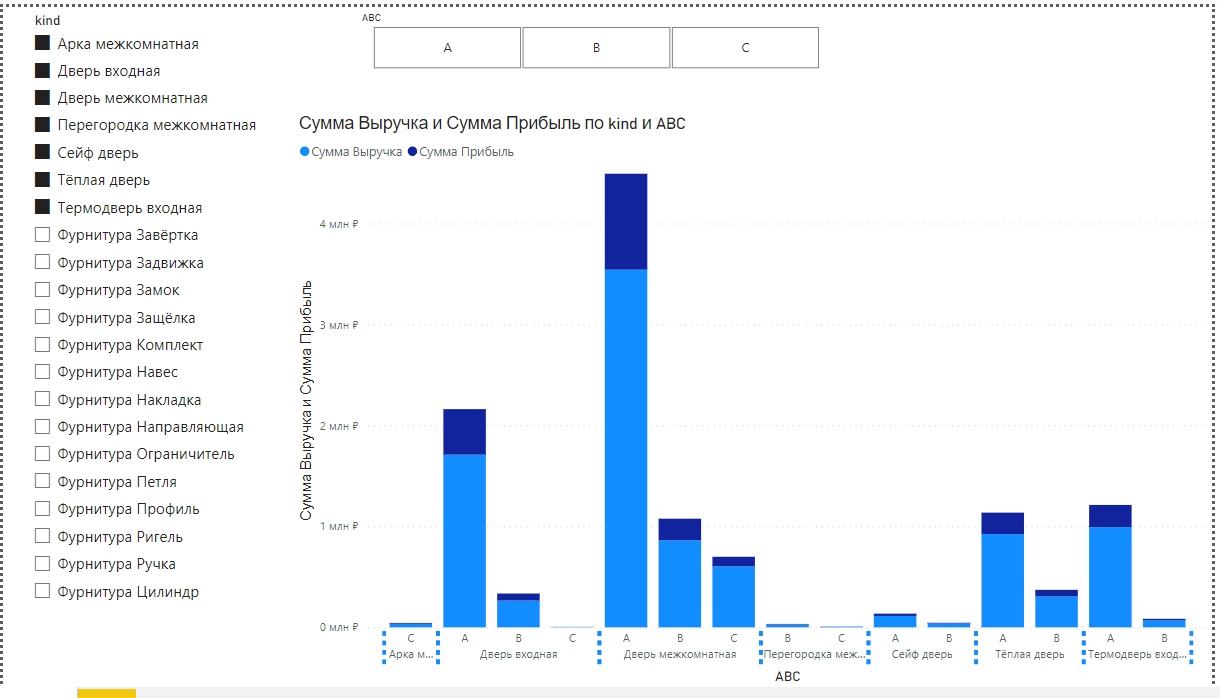

## Рекомендации к товарам группы С наименьшим количеством продаж

In [ ]:
#Список сортирован по количеству продаж
df_groupС = df_sorted.loc[df_sorted['ABC'] == 'C']\
    .sort_values(by='Количество продаж за квартал',
                          ascending = True)

In [ ]:
len(df_groupС)

216

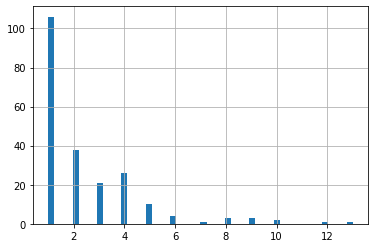

In [ ]:
df_groupС['Количество продаж за квартал'].hist(bins=50)

In [ ]:
# товары из группы C которые мало продаются - рекомендовать применить скидку, сортировано по выручке
df_groupС[df_groupС['Количество продаж за квартал']>3].sort_values(by='Выручка',
                                                                    ascending=False)

,Артикул,Название товара,Цена закупки,Цена продажи,Количество продаж за квартал,Выручка,Прибыль,percent,cumsum,ABC,kind
604,ДМ12297,"Дверь межкомнатная Ла Стелла 201, цвет тиковое дерево, экошпон, остекленная",2748.0,2890.0,10,28900.0,1420.0,0.000396,0.964841,C,Дверь межкомнатная
612,ДМ12306,"Дверь межкомнатная Ла Стелла 203, цвет ясень латте, экошпон, стекло матовое",2748.0,2890.0,9,26010.0,1278.0,0.000356,0.973401,C,Дверь межкомнатная
1280,ДМ20147,"Дверь межкомнатная Дуплекс Биланчино 06, цвет беленый дуб, экошпон, стекло матовое",2589.0,2440.0,9,21960.0,-1341.0,-0.000374,1.000000,C,Дверь межкомнатная
622,ДМ12318,"Дверь межкомнатная Ла Стелла 206, цвет тиковое дерево, экошпон, стекло матовое",2589.0,2890.0,5,14450.0,1505.0,0.000420,0.961147,C,Дверь межкомнатная
880,ДМ14292,"Дверь межкомнатная Ла Стелла 217, цвет ясень снежный, экошпон, стекло матовое",2633.0,2890.0,5,14450.0,1285.0,0.000358,0.973045,C,Дверь межкомнатная
873,ДМ14284,"Дверь межкомнатная Ла Стелла 202, цвет ясень снежный, экошпон, стекло матовое",2748.0,2890.0,4,11560.0,568.0,0.000158,0.994102,C,Дверь межкомнатная
1847,ДМ34946,"Дверь межкомнатная Ла Стелла 210, цвет дуб грей, экошпон, стекло матовое",2589.0,2890.0,4,11560.0,1204.0,0.000336,0.976848,C,Дверь межкомнатная
624,ДМ12320,"Дверь межкомнатная Ла Стелла 206, цвет дуб мокко, экошпон, стекло матовое",2589.0,2890.0,4,11560.0,1204.0,0.000336,0.976512,C,Дверь межкомнатная
608,ДМ12301,"Дверь межкомнатная Ла Стелла 202, цвет ясень латте, экошпон, стекло матовое",2748.0,2890.0,4,11560.0,568.0,0.000158,0.993785,C,Дверь межкомнатная
853,ДМ13816,"Дверь межкомнатная Ла Стелла 201, цвет ясень снежный, экошпон, остекленная",2748.0,2890.0,4,11560.0,568.0,0.000158,0.993943,C,Дверь межкомнатная


## Подготовить описание группы наиболее ценных товаров (общие особенности товаров входящих в эту группу).

## Рекомендации к первоочередной покупке - товары группы А с большим количеством продаж

In [ ]:
#Список сортирован по количеству продаж
df_groupA = df_sorted.loc[df_sorted['ABC'] == 'A']\
    .sort_values(by='Количество продаж за квартал',
                          ascending = False)

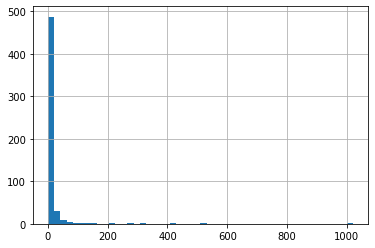

In [ ]:
df['Количество продаж за квартал'].hist(bins=50)

In [ ]:
df['Количество продаж за квартал'].median()

3.0

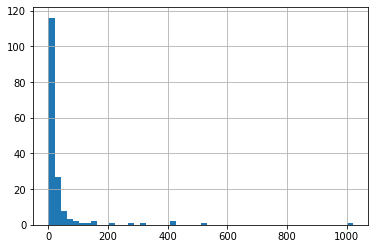

In [ ]:
df_groupA['Количество продаж за квартал'].hist(bins=50)

In [ ]:
# товары из группы А которые больше продаются - рекомендовать их к первоочередной закупке, сортировано по выручке
df_groupA[df_groupA['Количество продаж за квартал']>30].sort_values(by='Выручка',
                     ascending=False).to_csv('рекомендовать их к первоочередной закупке.csv')

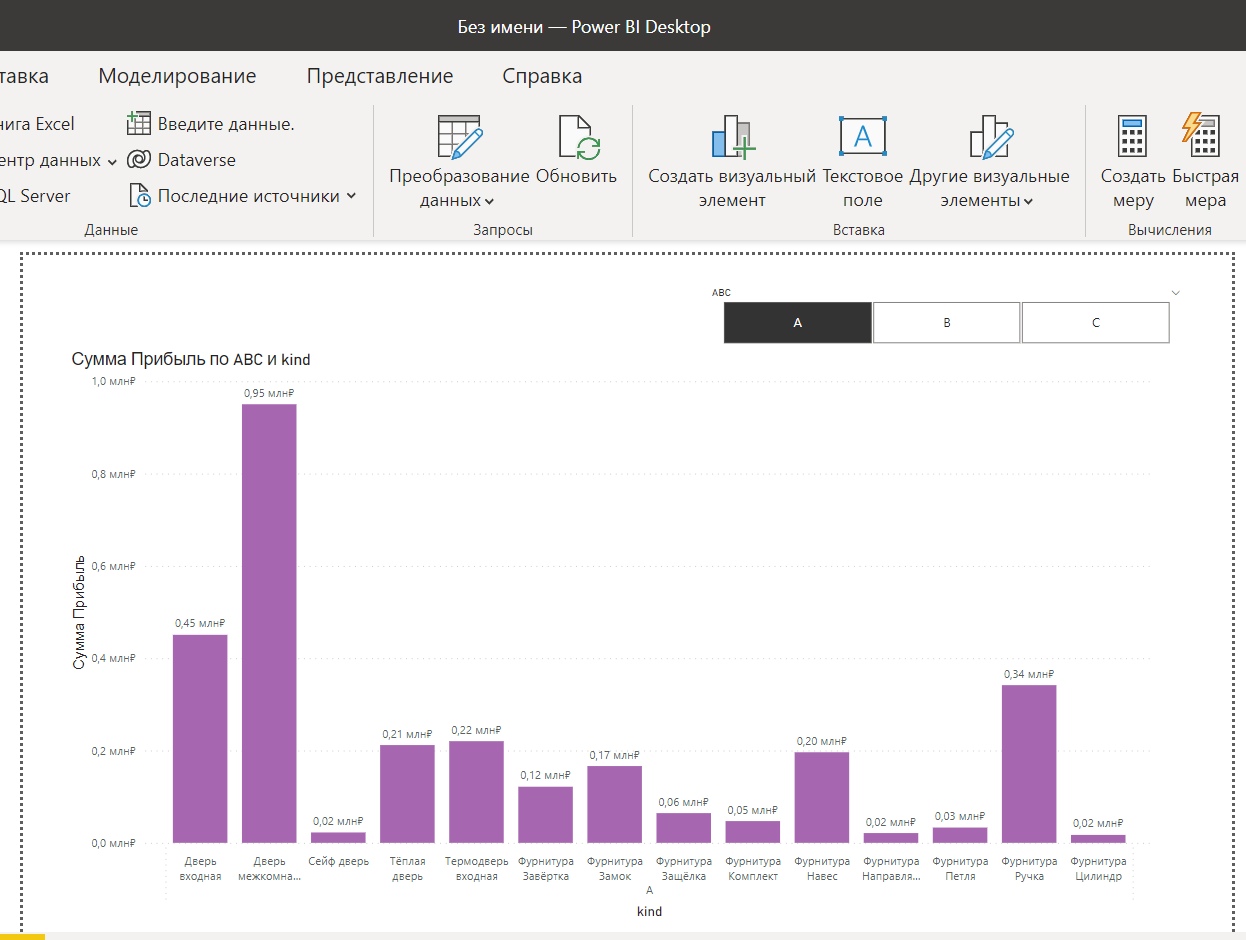

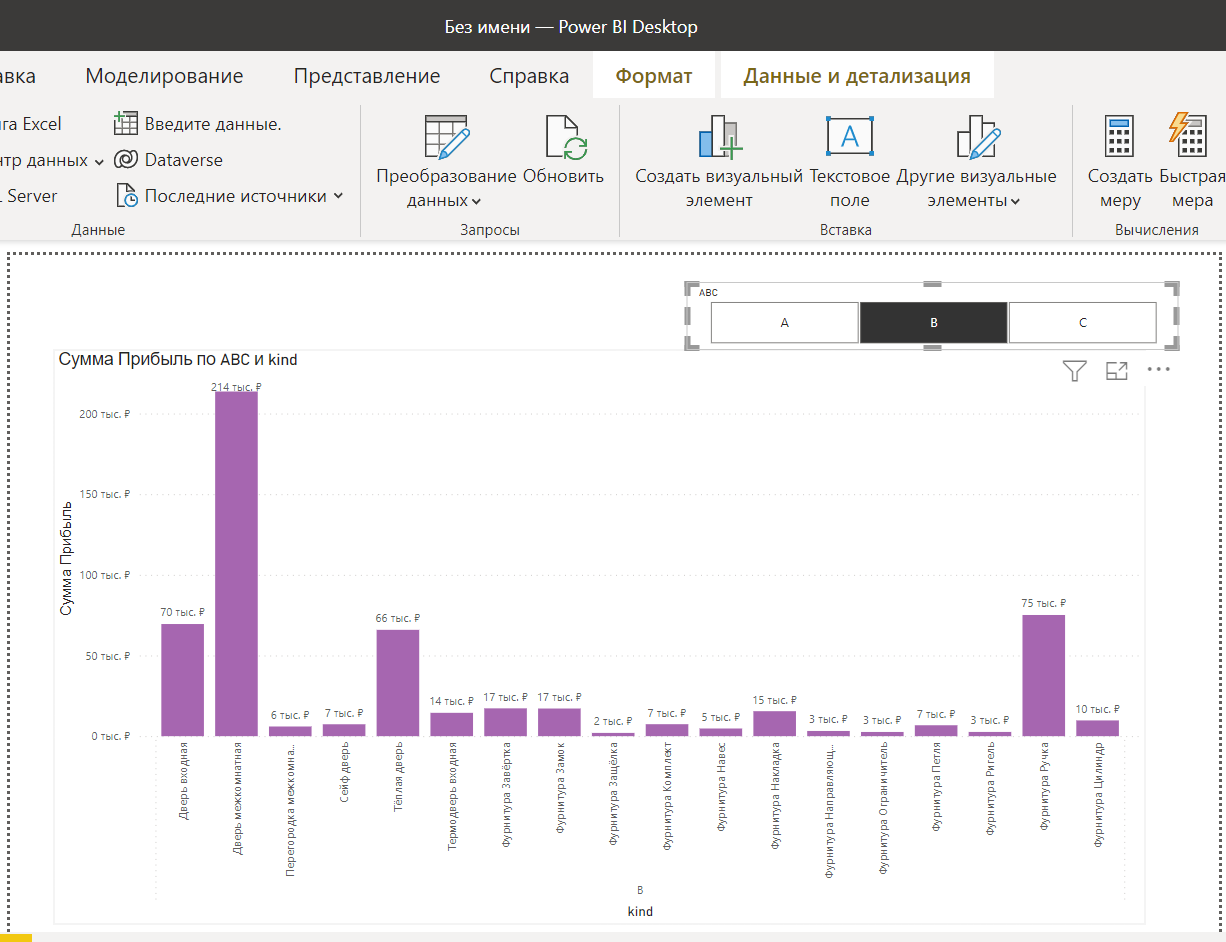

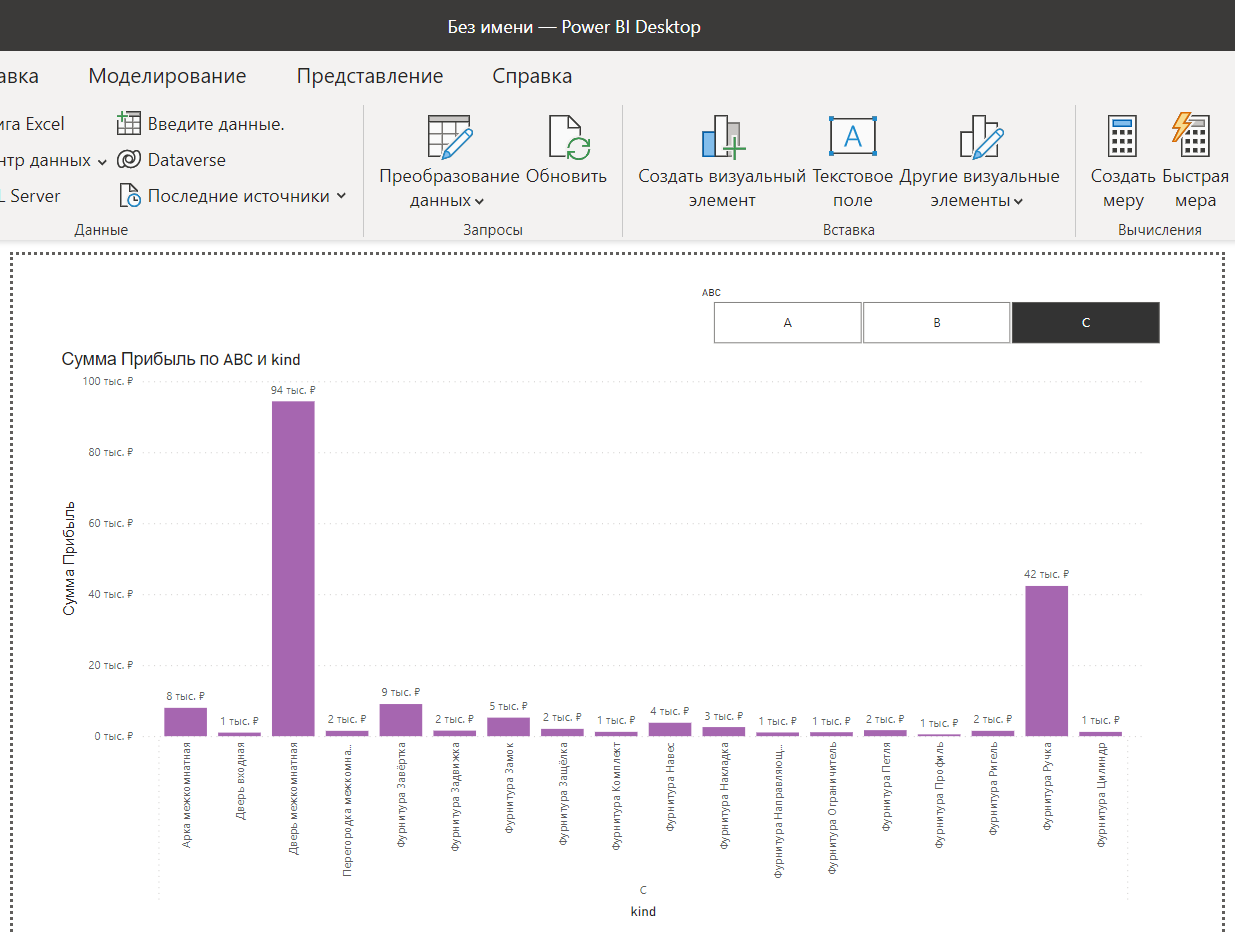

"Аналитическая записка по результатам анализа таблице ниже результаты продаж за 3й квартал 2018 года по одному из магазинов франшизной сети ГД.

"
Перечень выполненных работ по задаче, более подробно ход работ приведен в блокноте
1	Скачан csv, создать блокнот на colab ссылка: https://colab.research.google.com/drive/1fhcnHD8bz61xqftXurjm7NWc5CexDqNM?usp=sharing
2	Отфильтрованы продажи 3 квартала, создана колонка ABC, по прибыли A:0.80,B:0.95, C:1.00
3	Через re cоздана колонка "kind"  где сформирован укрупненный вид товара
4	Результат сохранен в csv файл, и открыт в Power BI (скрины визуализаций приведены в блокноте)
5	Подготовлен список  товаров с АВС, сохранен через csv во вкладку "Данные_pandas1"
6	"Для описания групп приведены визуализации в блокноте, общая рекомендация обратить особое внимание
видам товара ""Дверь межкомнатная"" и ""Фурнитура - ручка"""
7	На основе проведенного количественного анализа группы А даны рекомендации во вкладке 'Рекомендации к первоочередной покупке'
8	"На основе проведенного количественного анализа группы С дана рекомендация по перечню товаров, к которым надо сделать скидку
см в блокноте раздел ""Рекомендации к товарам группы С наименьшим количеством продаж"""